In [1]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import the function
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model_new import extract_time_series
from extract_for_model_new import scale_time_series

In [2]:
input_path = '/home/reference/data_interim/software_public_quarterly_revised_income_statements_INTERIM.csv'
features = [ 'IQ_EBIT','IQ_TOTAL_OPER_EXPEN','IQ_TOTAL_REV','IQ_OPER_INC','IQ_COGS','IQ_EARNING_CO']
ids        = []
year_min   = 2014
steps      = 0
unitshift = 0
train_df, test_df = extract_time_series(input_path = input_path,
                                   features = features,
                                    year_min = year_min,
                                      steps = steps,
                                unitshift = 0
                                 
                                
                                )

dataset = pd.concat([train_df,test_df])
print(dataset.head())

Size BEFORE dropping NA: (2216, 9)
Size AFTER dropping NA: (2134, 9)
TEST  set size: (503, 9)
TRAIN set size: (1631, 9)
TEST is 24% of all available datapoints
        company    year quarter   IQ_EBIT  IQ_TOTAL_OPER_EXPEN  IQ_TOTAL_REV  \
6     IQ1004737  2014.0      Q4  3.888034            29.596280     33.484314   
7     IQ1004737  2015.0      Q4  3.053093            24.853767     27.906860   
8     IQ1004737  2016.0      Q4  3.291391            30.007893     33.299282   
9     IQ1004737  2017.0      Q4  3.089815            37.900433     40.990250   
16  IQ100546355  2016.0      Q4  1.201000            10.910500     12.111500   

    IQ_OPER_INC    IQ_COGS  IQ_EARNING_CO  
6      3.888034  26.020964       1.206973  
7      3.053093  21.249535       1.987580  
8      3.291391  26.519487       0.650861  
9      3.089815  32.558550       1.231307  
16     1.201000   7.214500      -0.148500  


In [3]:
input_path = '/home/reference/data_interim2/software_public_quarterly_revised_balance_sheets_INTERIM.csv'
features = [ 'IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
ids        = []
year_min   = 2014
steps      = 0
unitshift = 0
train_df, test_df = extract_time_series(input_path = input_path,
                                   features = features,
                                    year_min = year_min,
                                        steps=steps,
                                        unitshift=unitshift
                                      
                                
                                       )
                                
            




dataset1 = pd.concat([train_df,test_df])
print(dataset1.head())

Size BEFORE dropping NA: (2205, 6)
Size AFTER dropping NA: (2027, 6)
TEST  set size: (481, 6)
TRAIN set size: (1546, 6)
TEST is 24% of all available datapoints
        company    year quarter      IQ_AR      IQ_RE  IQ_TOTAL_ASSETS
15  IQ100546355  2014.0      Q4   0.177000   1.576000        25.146000
17  IQ100546355  2016.0      Q4   8.918000  16.089000        84.113000
18  IQ100546355  2017.0      Q4   8.575000   4.963000        85.132000
21  IQ100842126  2014.0      Q4   8.536434  -8.726720        23.985275
22  IQ100842126  2015.0      Q4  14.441339  -7.972968        41.938730


In [4]:
dataset_merge = pd.merge(dataset,dataset1 , on= ['company','year'])

In [5]:
print(dataset_merge.head())

       company    year quarter_x   IQ_EBIT  IQ_TOTAL_OPER_EXPEN  IQ_TOTAL_REV  \
0    IQ1004737  2014.0        Q4  3.888034            29.596280     33.484314   
1  IQ100546355  2016.0        Q4  1.201000            10.910500     12.111500   
2  IQ100546355  2017.0        Q2 -0.725500            15.521500     14.796000   
3  IQ100842126  2014.0        Q4  0.288576            10.953217     11.241793   
4  IQ100842126  2015.0        Q4  1.942426            18.827354     20.769781   

   IQ_OPER_INC    IQ_COGS  IQ_EARNING_CO quarter_y      IQ_AR      IQ_RE  \
0     3.888034  26.020964       1.206973        Q4  57.847088   6.690141   
1     1.201000   7.214500      -0.148500        Q4   8.918000  16.089000   
2    -0.725500   9.156500      -0.647500        Q4   8.575000   4.963000   
3     0.288576  10.429866      -0.095747        Q4   8.536434  -8.726720   
4     1.942426  19.075912       0.795014        Q4  14.441339  -7.972968   

   IQ_TOTAL_ASSETS  
0       150.617280  
1        84.11

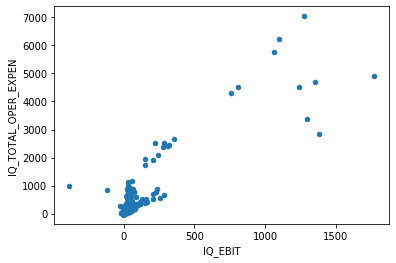

In [6]:
dataset_merge.plot(kind='scatter',x='IQ_EBIT', y='IQ_TOTAL_OPER_EXPEN')

In [7]:
scaler = StandardScaler()

In [8]:
scaled_features = dataset_merge.copy()
col_names = ['IQ_OPER_INC', 'IQ_EBIT','IQ_TOTAL_OPER_EXPEN','IQ_TOTAL_REV','IQ_COGS','IQ_EARNING_CO','IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

          company    year quarter_x    IQ_EBIT  IQ_TOTAL_OPER_EXPEN  \
0       IQ1004737  2014.0        Q4  -0.084076            -0.107462   
1     IQ100546355  2016.0        Q4  -0.113442            -0.154268   
2     IQ100546355  2017.0        Q2  -0.134496            -0.142717   
3     IQ100842126  2014.0        Q4  -0.123413            -0.154161   
4     IQ100842126  2015.0        Q4  -0.105339            -0.134437   
...           ...     ...       ...        ...                  ...   
1981     IQ972190  2018.0        Q4  13.822253            17.436052   
1982   IQ98129600  2018.0        Q4  -0.130981            -0.176162   
1983   IQ98244713  2018.0        Q4  -0.126226            -0.169741   
1984    IQ9845893  2018.0        Q4  -0.118708            -0.169112   
1985    IQ9898268  2018.0        Q4  -0.113903            -0.164691   

      IQ_TOTAL_REV  IQ_OPER_INC    IQ_COGS  IQ_EARNING_CO quarter_y  \
0        -0.104819    -0.084076  -0.087623      -0.094262        Q4   
1    

In [9]:
scaled_features=scaled_features.drop(['quarter_x','quarter_y'],axis =1)

In [10]:
scaled_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
company                1986 non-null object
year                   1986 non-null float64
IQ_EBIT                1986 non-null float64
IQ_TOTAL_OPER_EXPEN    1986 non-null float64
IQ_TOTAL_REV           1986 non-null float64
IQ_OPER_INC            1986 non-null float64
IQ_COGS                1986 non-null float64
IQ_EARNING_CO          1986 non-null float64
IQ_AR                  1986 non-null float64
IQ_RE                  1986 non-null float64
IQ_TOTAL_ASSETS        1986 non-null float64
dtypes: float64(10), object(1)
memory usage: 186.2+ KB


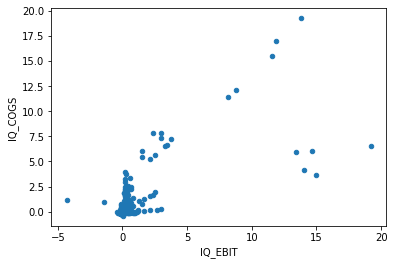

In [11]:
scaled_features.plot(kind='scatter',x='IQ_EBIT',y='IQ_COGS')

Text(0.5, 1.0, 'Silhouetter Score Curve')

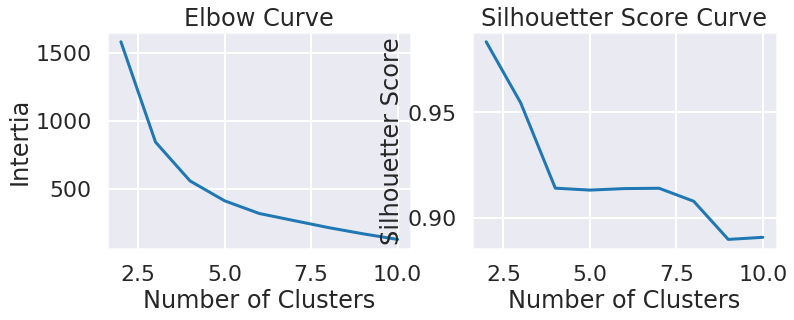

In [42]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = scaled_features.loc[:,'IQ_EBIT':'IQ_OPER_INC']
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [43]:
# We retain 3 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=3, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-0.08684023, -0.09409154, -0.09428478, -0.08684023],
       [13.04993395, 11.87592359, 12.2963804 , 13.04993395],
       [ 2.48171984,  4.1037614 ,  3.86464782,  2.48171984]])

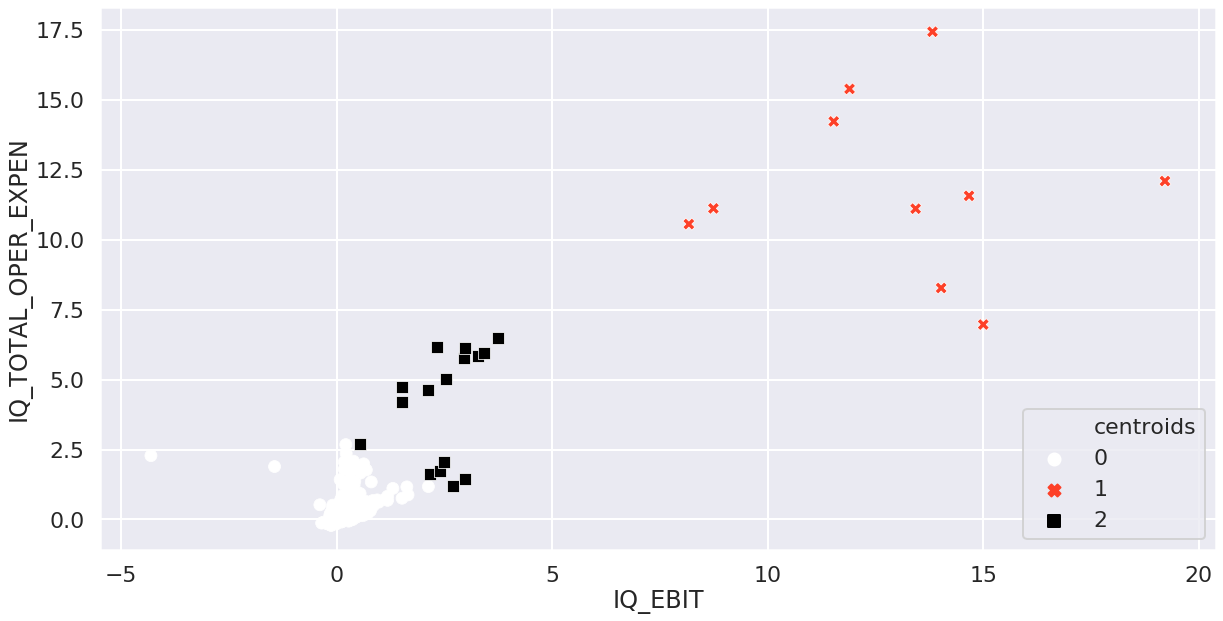

In [44]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
scaled_features = scaled_features.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
scaled_features.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_EBIT", y="IQ_TOTAL_OPER_EXPEN", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = scaled_features)


plt.legend(loc='lower right')
 
#sns.plt.show()

In [45]:
for i in range(3):
    print(i,len(cluster_label[cluster_label==i]))

0 1960
1 10
2 16


In [46]:
#Get all the rows in the zero cluster
#Get all the index of these rows
#Build a dictionary wit indexes of these rows and zero
scaled_features_clust = scaled_features[scaled_features['centroids']==0]
scaled_features_index_0 = scaled_features.index[scaled_features['centroids']==0].tolist()
dict_index =  dict(zip(scaled_features_index_0,[0]*len(scaled_features_index_0)))
print(len(dict_index))

1960


In [47]:
#Mix all the clusters 
for key in list(dict_index.keys()):
    scaled_features.loc[key,'centroids']= dict_index[key]

In [48]:
new_dataset_clust0 =scaled_features.loc[scaled_features['centroids']==0]

[Text(1116.0, 1812.0, 'X[3] <= 2.131\ngini = 0.017\nsamples = 1986\nvalue = [[26, 1960]\n[1976, 10]\n[1970, 16]]'),
 Text(558.0, 1087.2, 'X[2] <= 2.299\ngini = 0.002\nsamples = 1963\nvalue = [[3, 1960]\n[1963, 0]\n[1960, 3]]'),
 Text(279.0, 362.39999999999986, 'gini = 0.0\nsamples = 1960\nvalue = [[0, 1960]\n[1960, 0]\n[1960, 0]]'),
 Text(837.0, 362.39999999999986, 'gini = 0.0\nsamples = 3\nvalue = [[3, 0]\n[3, 0]\n[0, 3]]'),
 Text(1674.0, 1087.2, 'X[0] <= 5.961\ngini = 0.328\nsamples = 23\nvalue = [[23, 0]\n[13, 10]\n[10, 13]]'),
 Text(1395.0, 362.39999999999986, 'gini = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]\n[0, 13]]'),
 Text(1953.0, 362.39999999999986, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]\n[10, 0]]')]

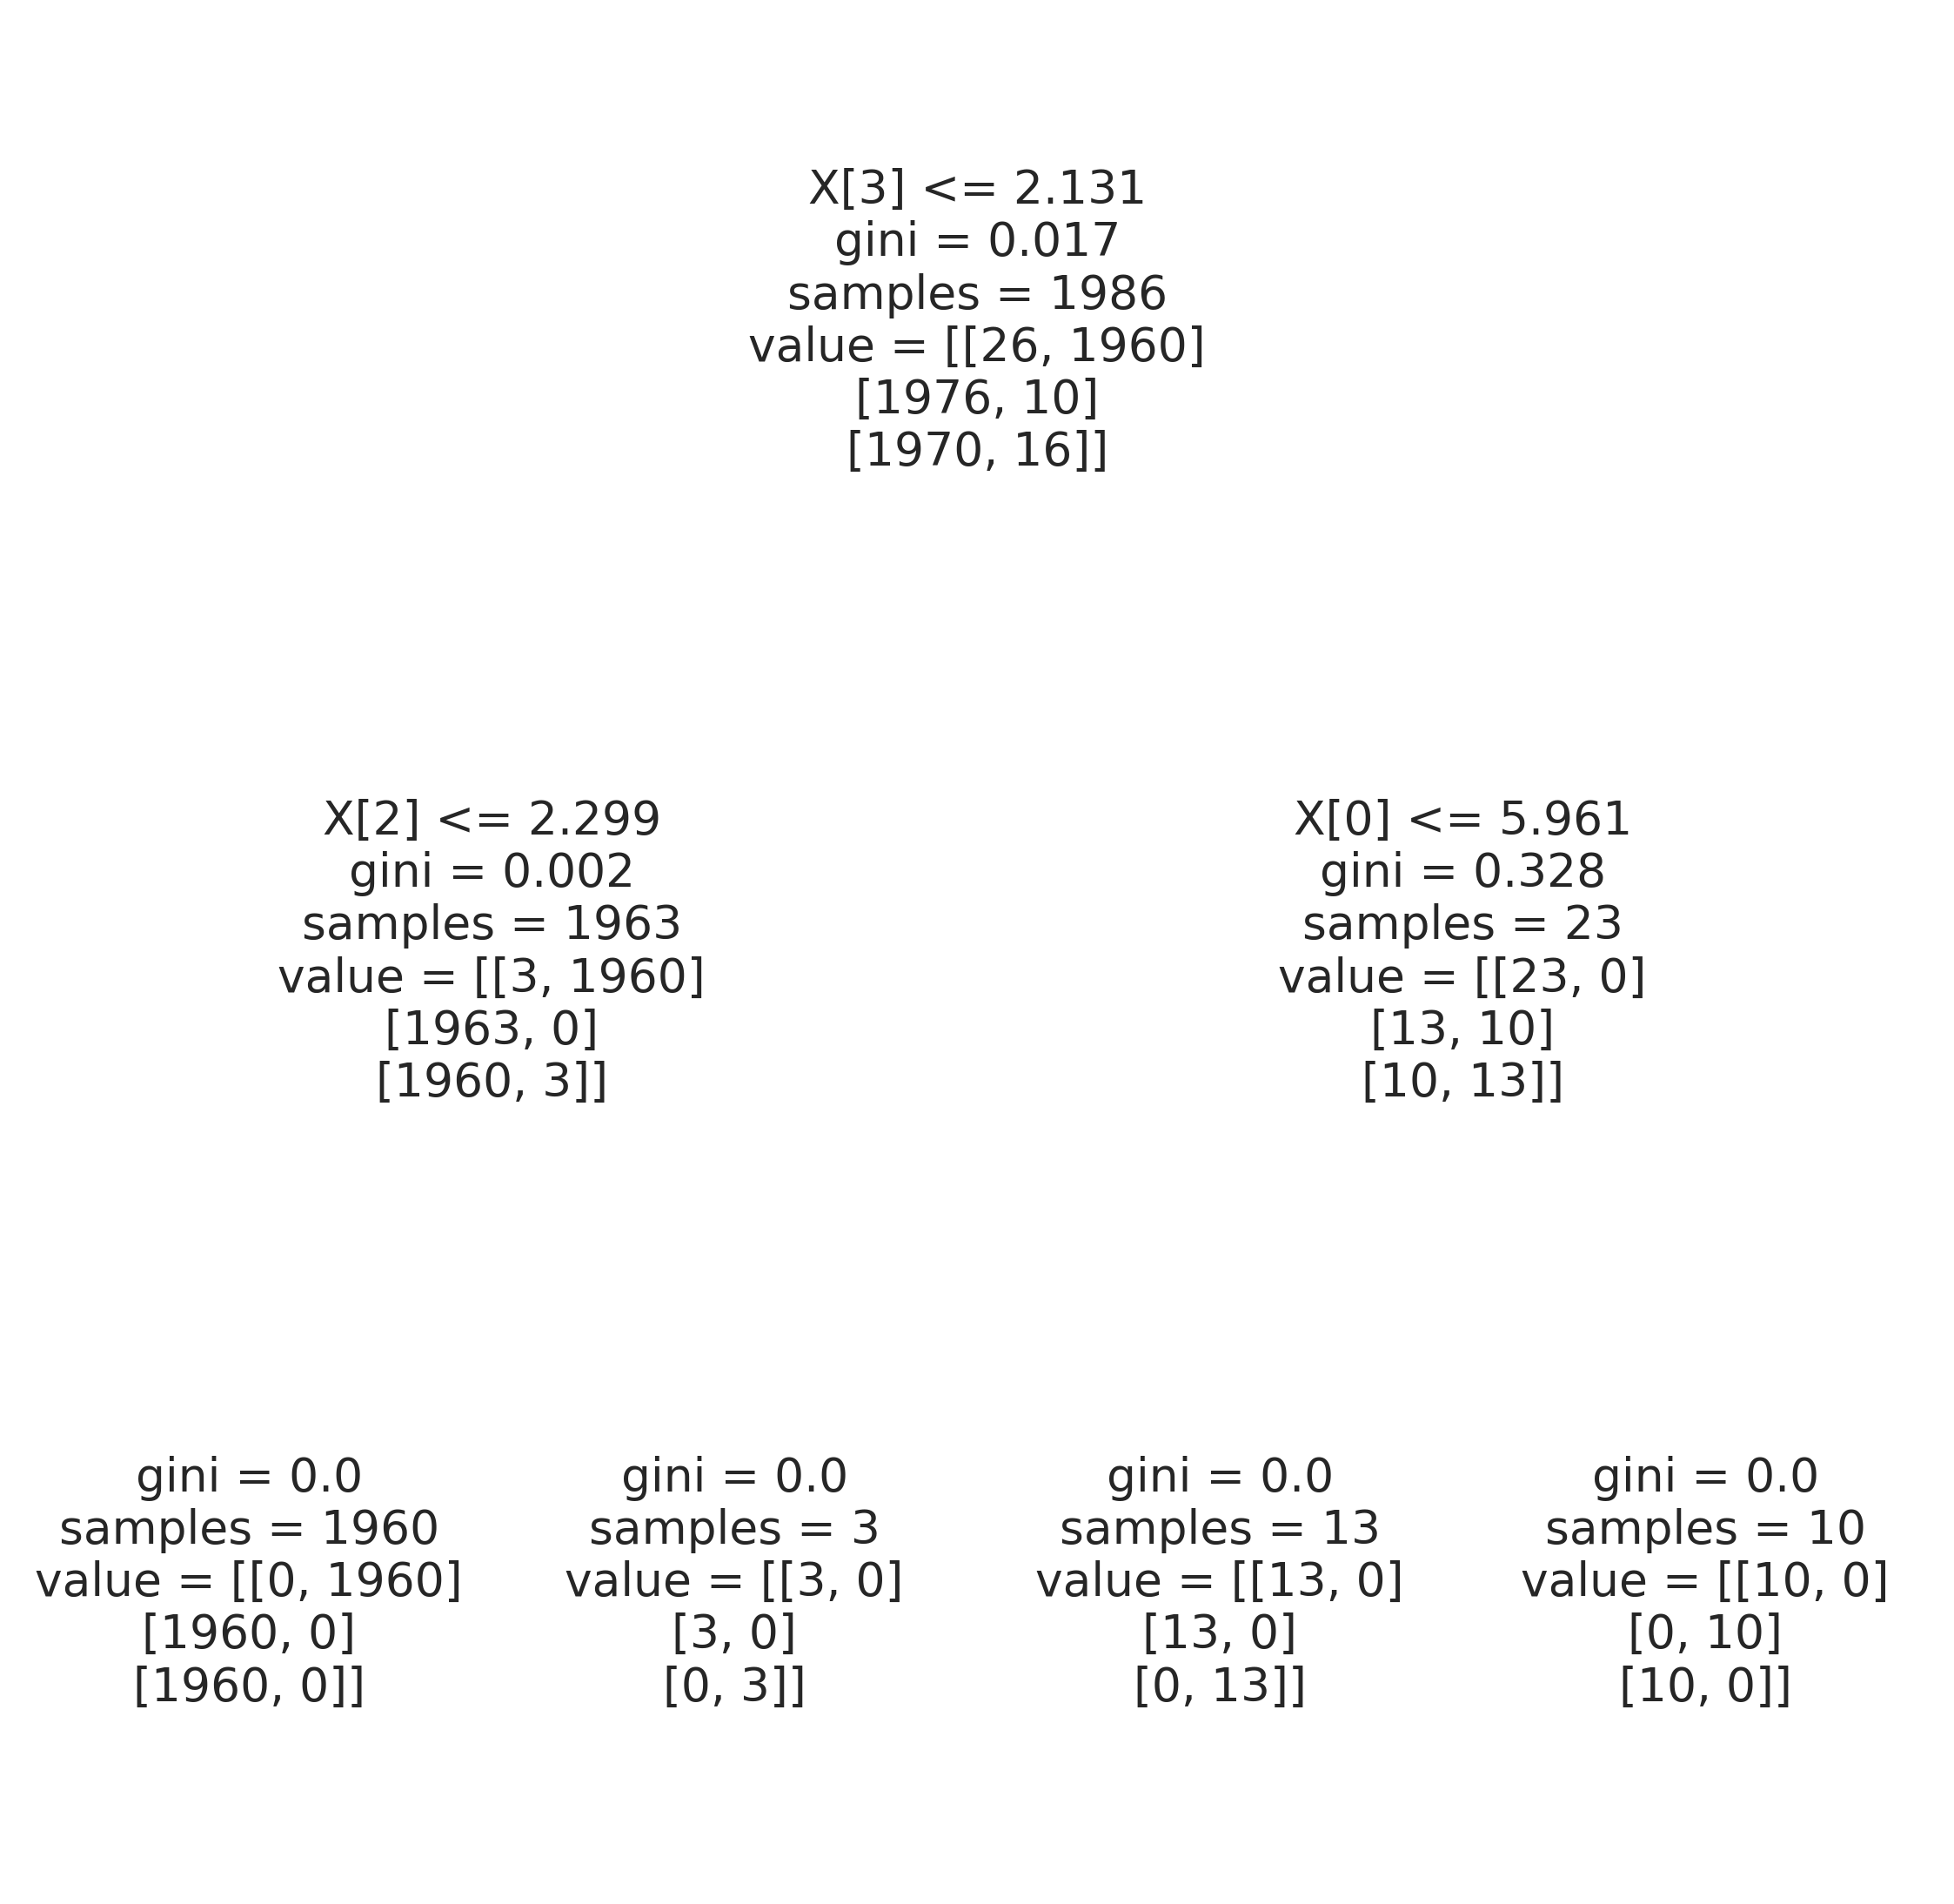

In [54]:
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_features.loc[:,"IQ_EBIT":"IQ_OPER_INC"],pd.get_dummies(scaled_features.loc[:,"centroids"]) )
tree.plot_tree(clf) 

In [ ]:
#len(scaled_features[scaled_features['IQ_EBIT']<= 2.203)

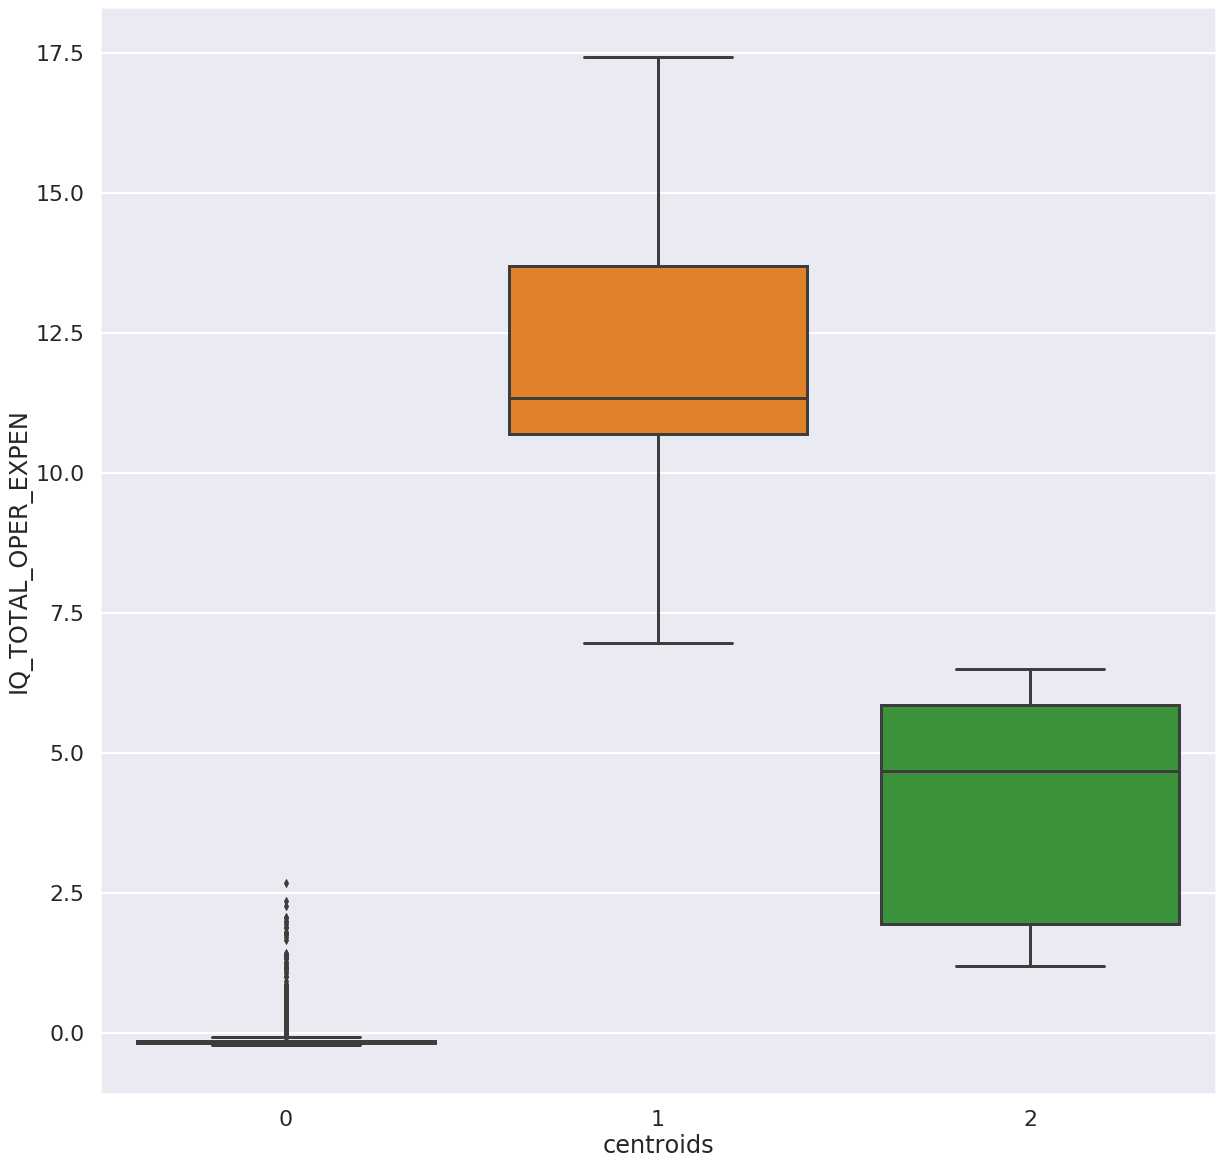

In [55]:
plt.rcParams["figure.figsize"]=20,20

sns.boxplot(x="centroids",y="IQ_TOTAL_OPER_EXPEN", data = scaled_features)

In [56]:
features = [ 'IQ_EBIT','IQ_TOTAL_OPER_EXPEN','IQ_TOTAL_REV','IQ_OPER_INC']

In [57]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= features,  
                      class_names= scaled_features.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreenewdatasetclust0")

'decisiontreenewdatasetclust0.pdf'

In [58]:
dataset = new_dataset_clust0.drop(['centroids'],axis=1)

Text(0.5, 1.0, 'Silhouetter Score Curve')

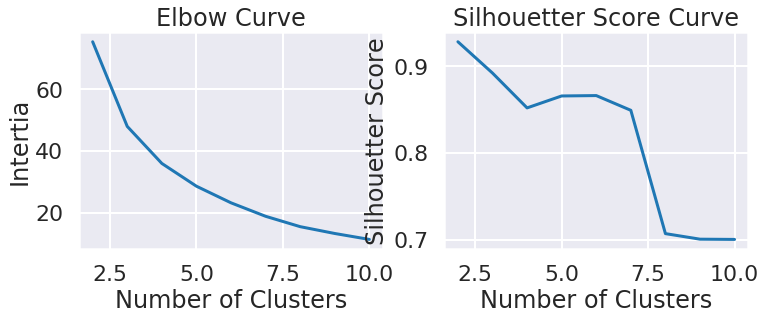

In [59]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = dataset.loc[:,'IQ_COGS':'IQ_EARNING_CO']
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [60]:
# We retain 3 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=3, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-0.14196538, -0.09652873],
       [ 0.70771133,  0.25096126],
       [ 2.32517472,  0.22682691]])

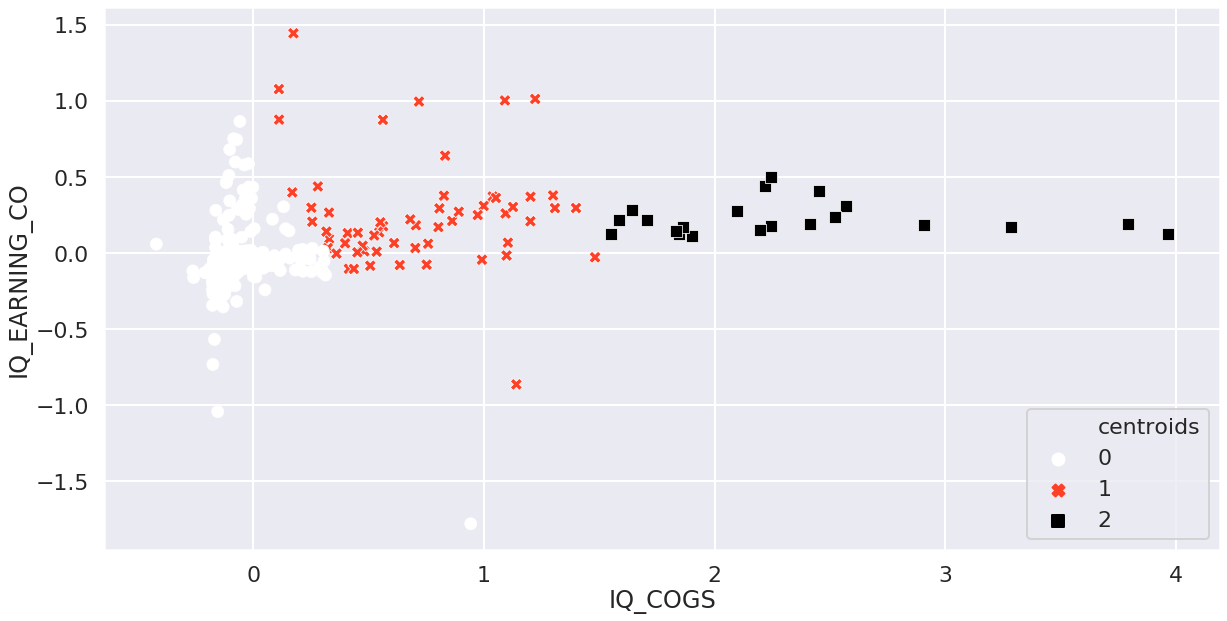

In [61]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
dataset = dataset.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
dataset.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_COGS", y="IQ_EARNING_CO", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset)


plt.legend(loc='lower right')
 

In [62]:
for i in range(3):
    print(i,len(cluster_label[cluster_label==i]))

0 1880
1 59
2 21


In [63]:
#Get all the rows in the zero cluster
#Get all the index of these rows
#Build a dictionary wit indexes of these rows a
dataset_clust = dataset[dataset['centroids']==0]
dataset_index_0 = dataset.index[dataset['centroids']==0].tolist()
dict_index =  dict(zip(dataset_index_0,[0]*len(dataset_index_0)))
print(len(dict_index))

1880


In [64]:
#Mix all the clusters 
for key in list(dict_index.keys()):
    dataset.loc[key,'centroids']= dict_index[key]

In [65]:
dataset1 = dataset.loc[dataset['centroids']==0]

[Text(1395.0, 1993.2, 'X[0] <= 0.316\ngini = 0.053\nsamples = 1960\nvalue = [[80, 1880]\n[1901, 59]\n[1939, 21]]'),
 Text(930.0, 1630.8000000000002, 'X[1] <= 0.871\ngini = 0.005\nsamples = 1886\nvalue = [[7, 1879]\n[1879, 7]\n[1886, 0]]'),
 Text(744.0, 1268.4, 'X[0] <= 0.25\ngini = 0.003\nsamples = 1883\nvalue = [[4, 1879]\n[1879, 4]\n[1883, 0]]'),
 Text(372.0, 906.0, 'X[0] <= 0.165\ngini = 0.001\nsamples = 1872\nvalue = [[1, 1871]\n[1871, 1]\n[1872, 0]]'),
 Text(186.0, 543.5999999999999, 'gini = 0.0\nsamples = 1861\nvalue = [[0, 1861]\n[1861, 0]\n[1861, 0]]'),
 Text(558.0, 543.5999999999999, 'X[1] <= 0.212\ngini = 0.11\nsamples = 11\nvalue = [[1, 10]\n[10, 1]\n[11, 0]]'),
 Text(372.0, 181.19999999999982, 'gini = 0.0\nsamples = 10\nvalue = [[0, 10]\n[10, 0]\n[10, 0]]'),
 Text(744.0, 181.19999999999982, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(1116.0, 906.0, 'X[1] <= 0.119\ngini = 0.264\nsamples = 11\nvalue = [[3, 8]\n[8, 3]\n[11, 0]]'),
 Text(930.0, 543.59999

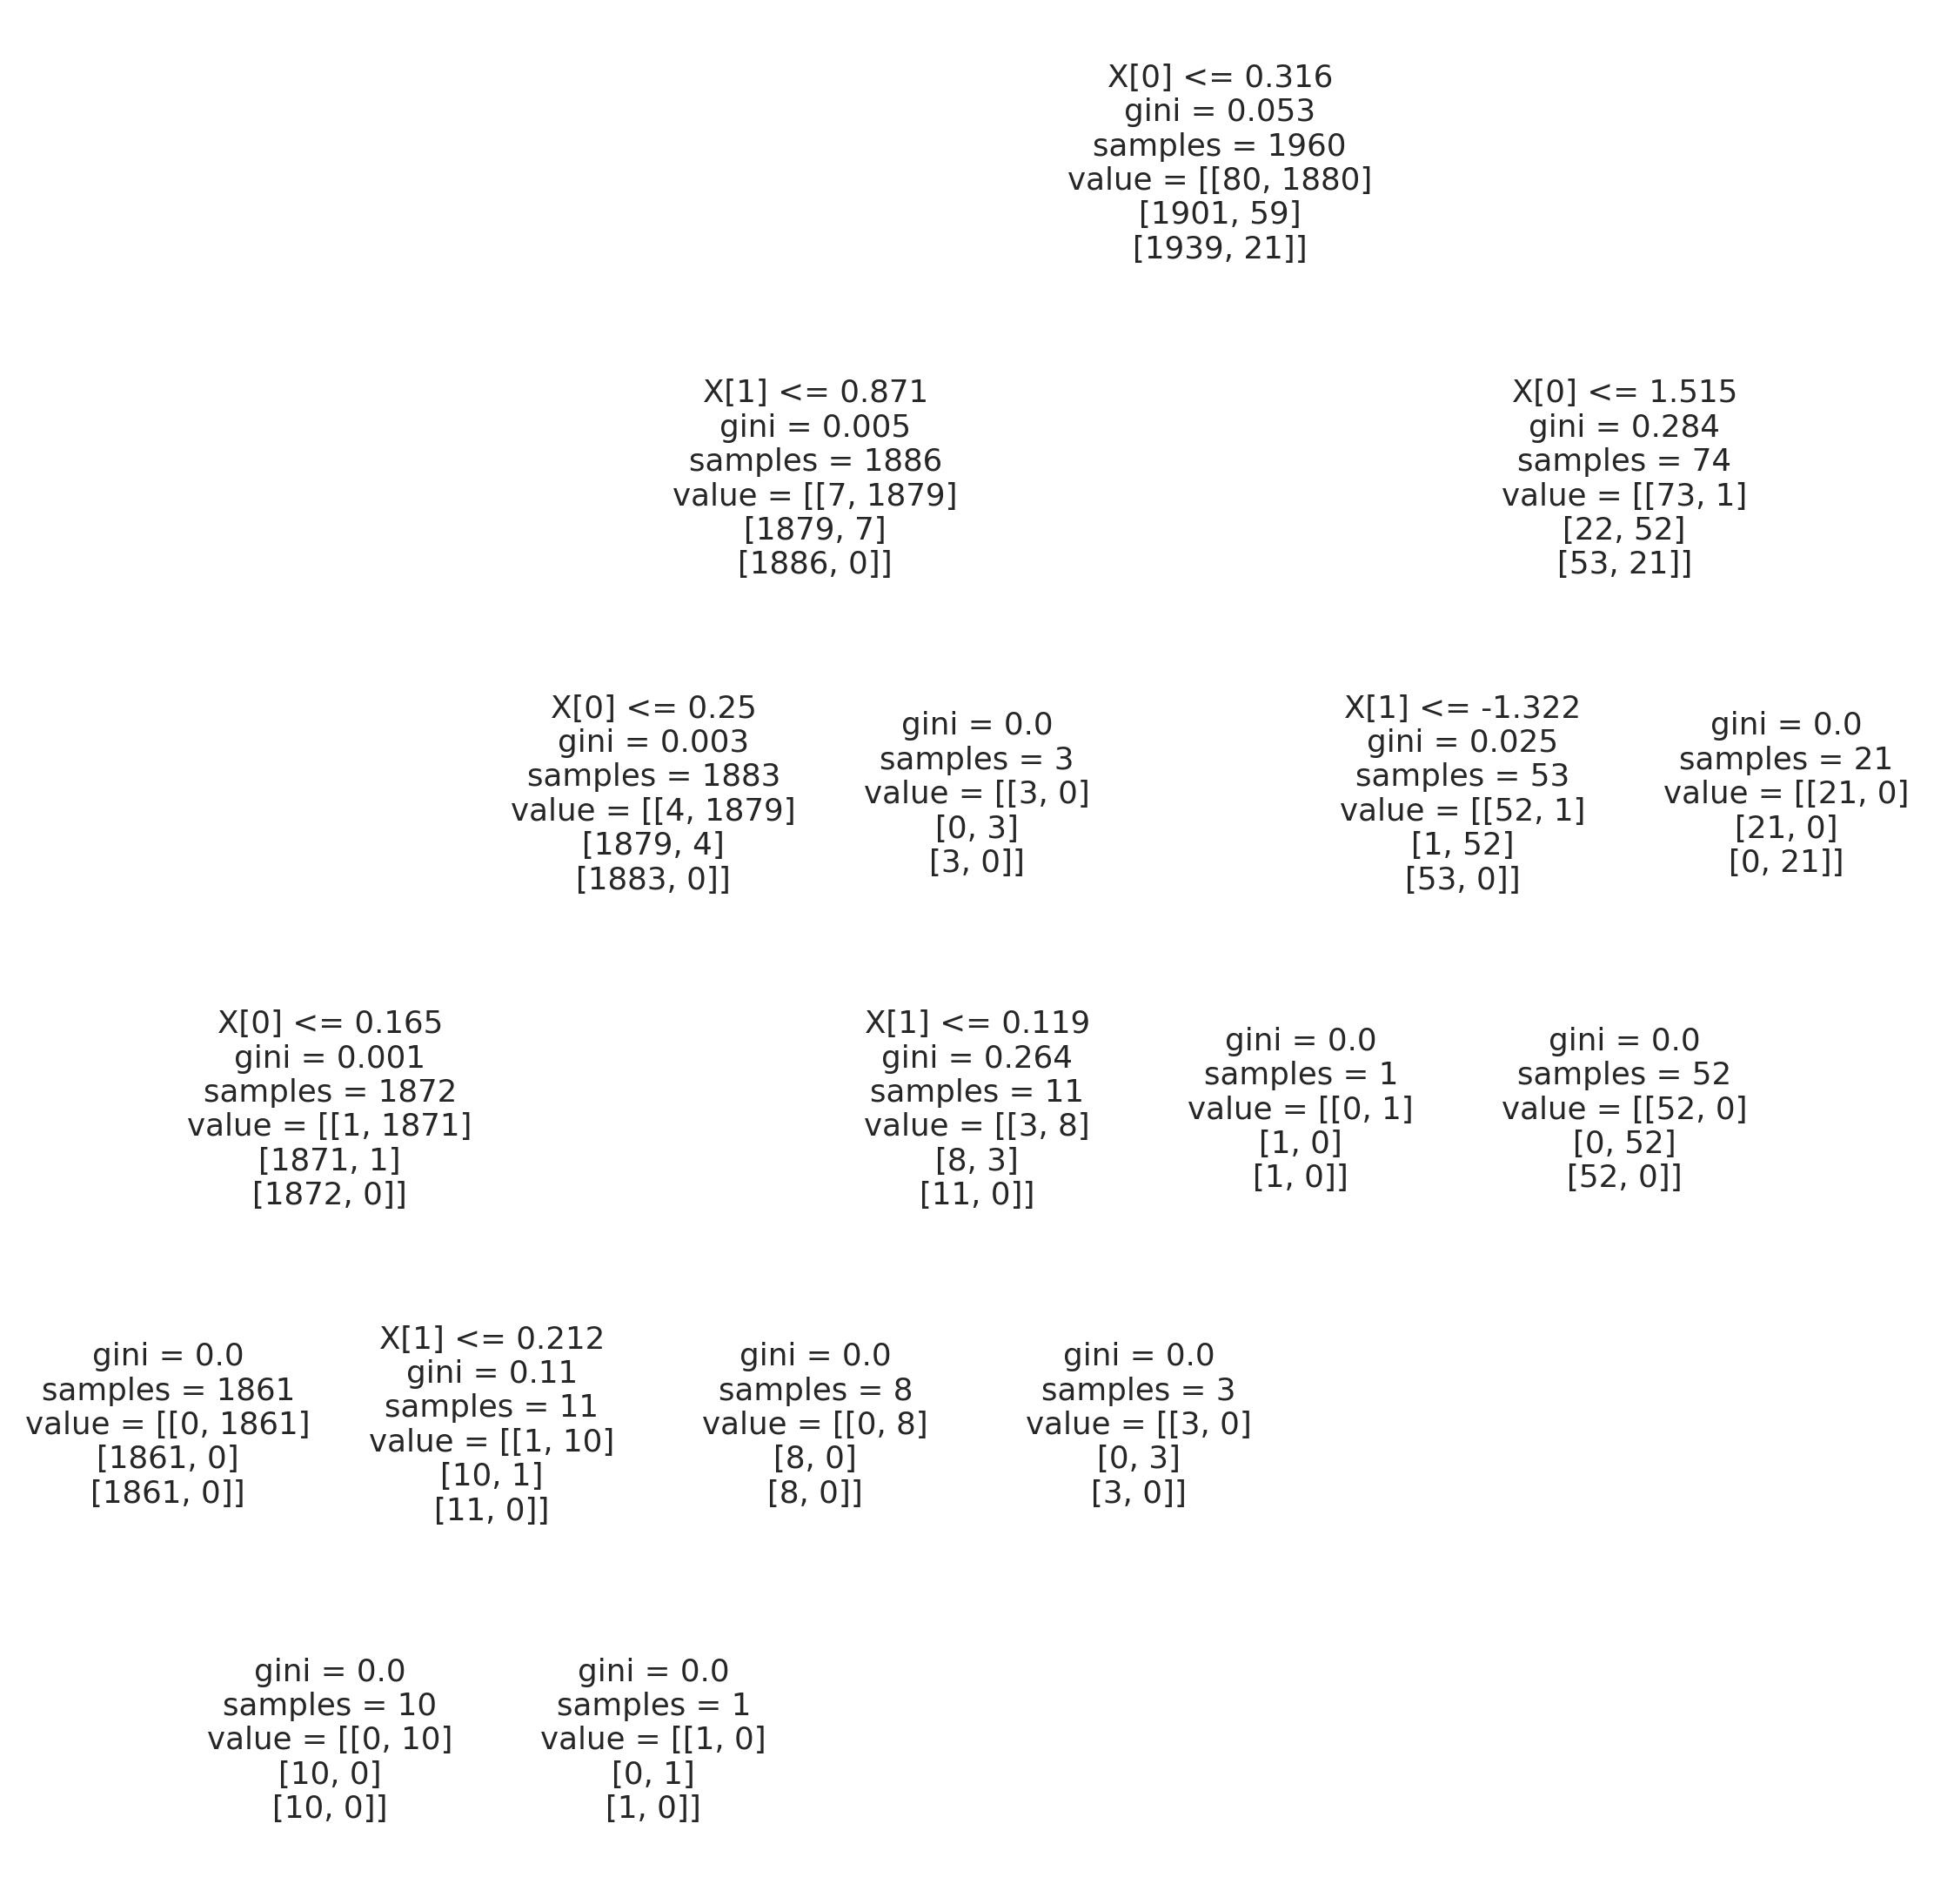

In [66]:
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
clf = tree.DecisionTreeClassifier()
clf = clf.fit(dataset.loc[:,"IQ_COGS":"IQ_EARNING_CO"],pd.get_dummies(dataset.loc[:,"centroids"]) )
tree.plot_tree(clf) 

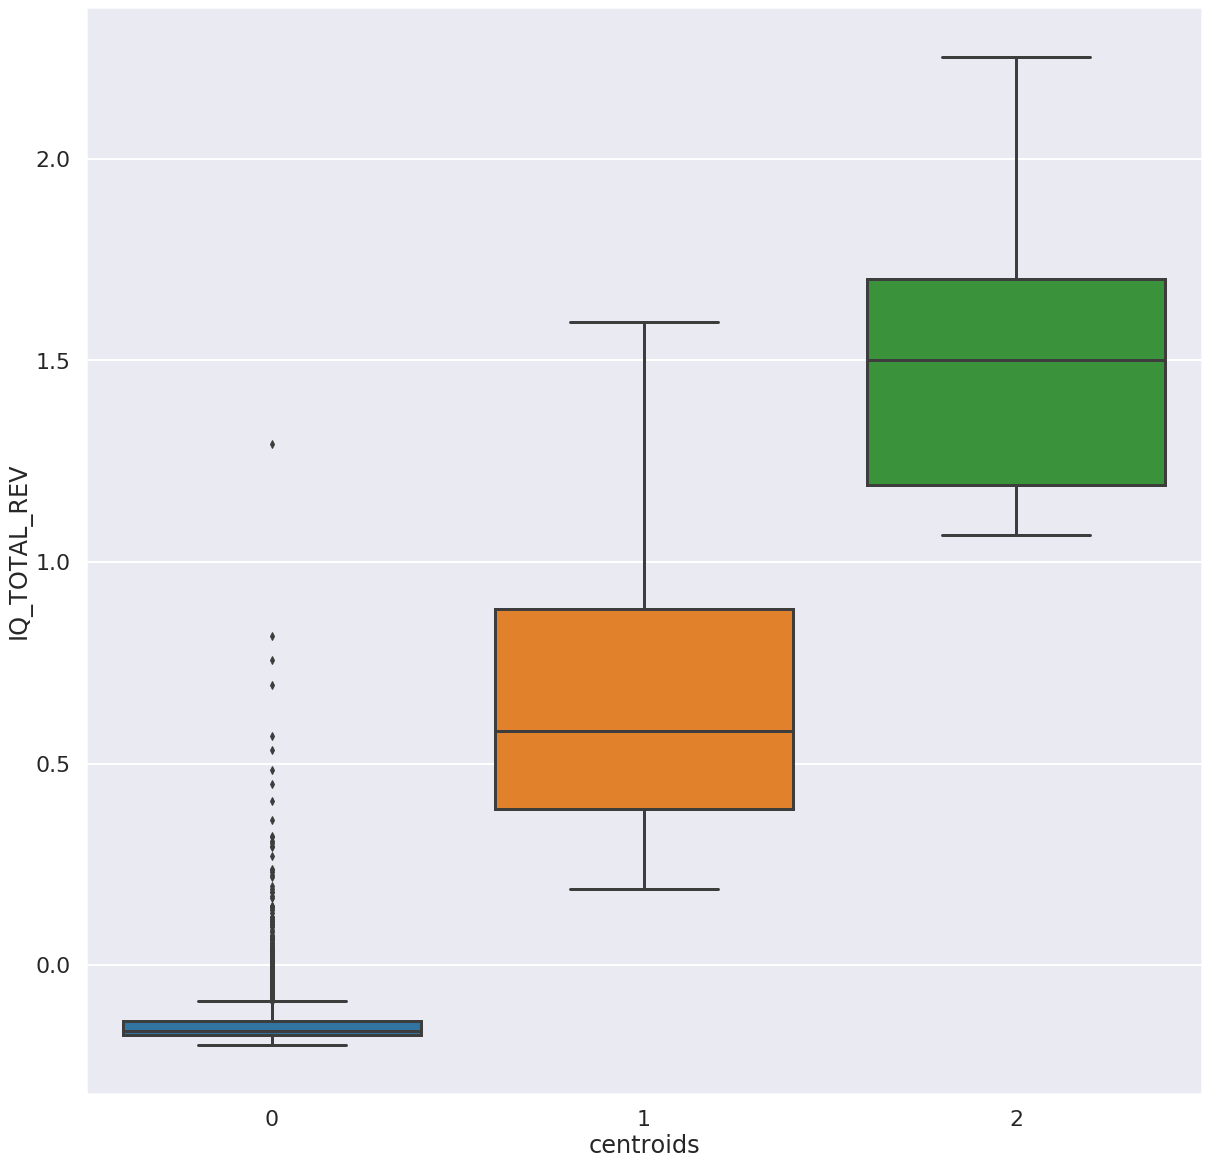

In [67]:
plt.rcParams["figure.figsize"]=20,20

sns.boxplot(x="centroids",y="IQ_TOTAL_REV", data = dataset)

In [68]:
features = ['IQ_COGS','IQ_EARNING_CO']

In [69]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= features,  
                      class_names= dataset.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreenewdataset1")

'decisiontreenewdataset1.pdf'

In [70]:
new_dataset1 = dataset.drop(['centroids'],axis=1)

In [71]:
new_dataset1.head()

,company,year,IQ_EBIT,IQ_TOTAL_OPER_EXPEN,IQ_TOTAL_REV,IQ_OPER_INC,IQ_COGS,IQ_EARNING_CO,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS
0,IQ1004737,2014.0,-0.084076,-0.107462,-0.104819,-0.084076,-0.087623,-0.094262,-0.046611,-0.092429,-0.103198
1,IQ100546355,2016.0,-0.113442,-0.154268,-0.149099,-0.113442,-0.151330,-0.111426,-0.167042,-0.083616,-0.132037
2,IQ100546355,2017.0,-0.134496,-0.142717,-0.143537,-0.134496,-0.144751,-0.117745,-0.167887,-0.094048,-0.131595
3,IQ100842126,2014.0,-0.123413,-0.154161,-0.150901,-0.123413,-0.140438,-0.110758,-0.167982,-0.106884,-0.158110
4,IQ100842126,2015.0,-0.105339,-0.134437,-0.131161,-0.105339,-0.111149,-0.099479,-0.153448,-0.106177,-0.150325


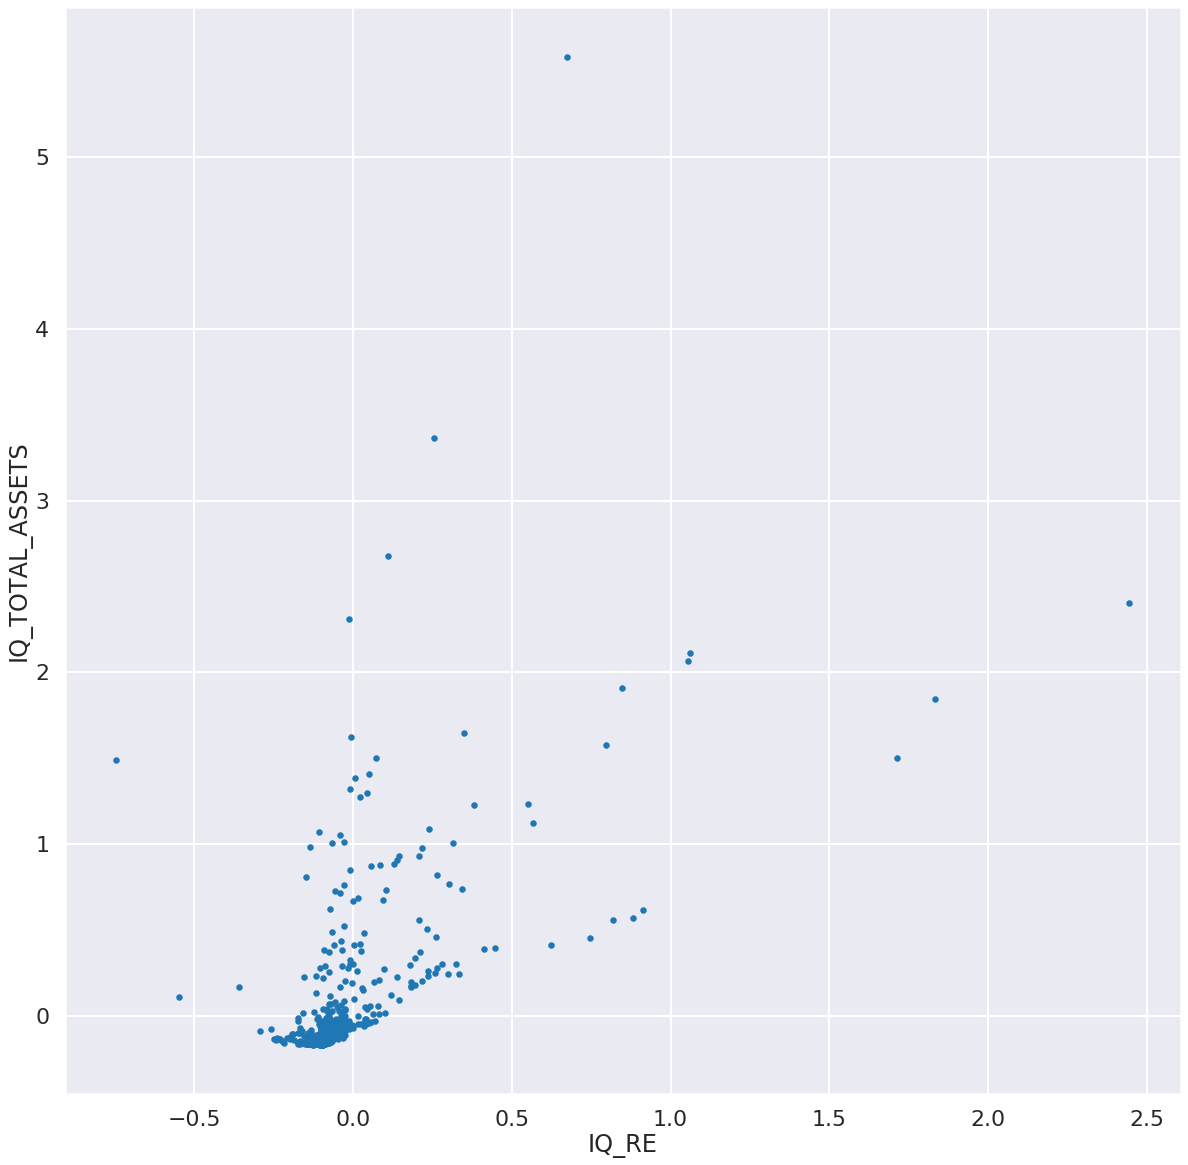

In [37]:
new_dataset1.plot(kind='scatter' , x='IQ_RE',y='IQ_TOTAL_ASSETS')

Text(0.5, 1.0, 'Silhouetter Score Curve')

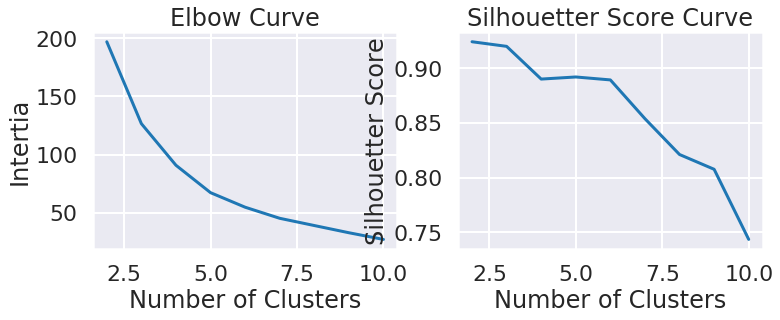

In [72]:
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters
from sklearn.metrics import silhouette_samples, silhouette_score


inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
X = new_dataset1.loc[:,'IQ_AR':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i,random_state = 0)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))

fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [73]:
# We retain 3 clusters due to inertia and the silhouette curve
y_pred = KMeans(n_clusters=3, random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)
centroid = y_pred.cluster_centers_



centroid

array([[-0.14421667, -0.09110139, -0.13270561],
       [ 1.21155276,  0.27488455,  1.00519695],
       [ 6.96711184,  0.18259115,  3.01985771]])

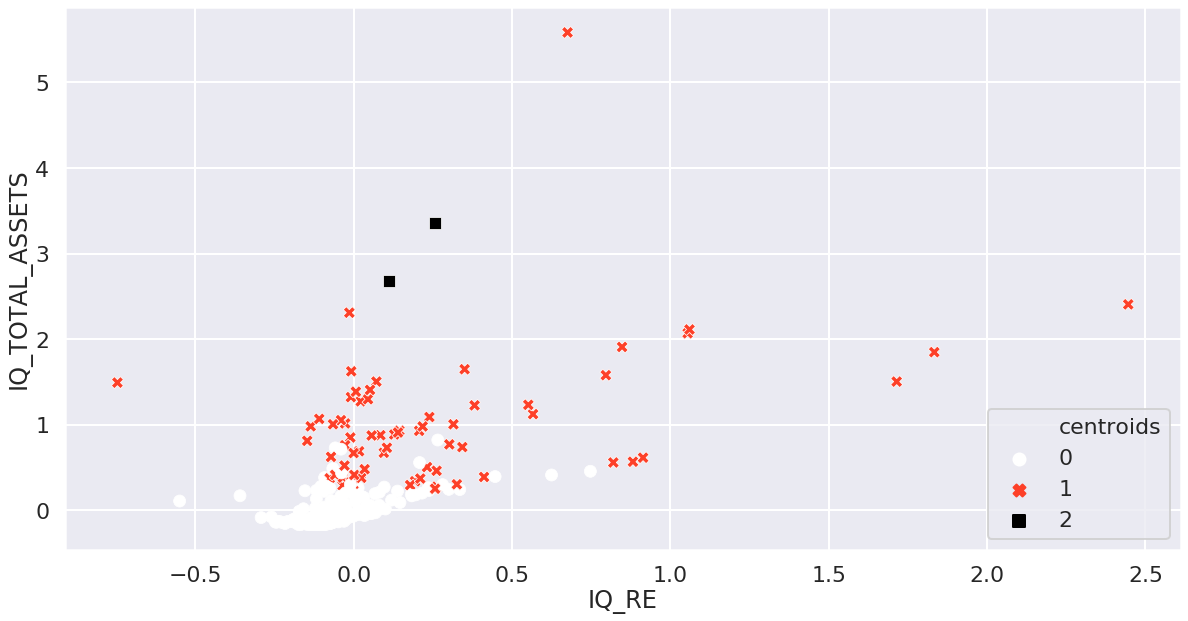

In [40]:
# Get the clusters for each row
clusters  = pd.Series(y_pred.labels_)
new_dataset1= new_dataset1.assign(centroids=clusters.values)

#Add a new column to the dataframe defining the cluster for each row
new_dataset1.head()

sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_RE", y="IQ_TOTAL_ASSETS", hue="centroids",style = "centroids",palette =  "CMRmap_r",data =new_dataset1)


plt.legend(loc='lower right')
 

In [74]:
for i in range(3):
    print(i,len(cluster_label[cluster_label==i]))

0 1891
1 67
2 2
